In [395]:
# To do:
# Fix Dates, must be another published on vs premiered on discrepancy -- OK
# Fix Titles -- OK
# Looks like missing one (1) video for Gibi 344/345 -- OK
# DUPLICATES -- OK
# User entered date range --
# Better commenting --
# Duration --

# Import Dependencies
from bs4 import BeautifulSoup as bs
import requests
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from datetime import datetime
pd.set_option('display.max_rows', 500)

In [396]:
converted_date = ""
raw_months = {"Jan": 1, "Feb": 2, "Mar" : 3, "Apr" : 4, 
              "May" : 5, "Jun" : 6, "Jul" : 7, "Aug" : 8,
              "Sep" : 9, "Oct" : 10, "Nov" : 11, "Dec" : 12}

# Convert Date from Jan 1, 1999 format to datetime object
def convertDate(raw_date):
    
    converted_date = ""
    
    number_month = raw_months.get(raw_date[0])
    
    date_str = (str(number_month) + "/" + raw_date[1] + "/" + raw_date[2]).replace(",", "")
    
    converted_date = datetime.strptime(date_str, '%m/%d/%Y')
    
    return converted_date

In [397]:
# Get Youtuber's Name
input_name = input("Enter Youtuber's Name: ")

list_name = input_name.split()

converted_name = input_name

if len(list_name) > 1:
    
    converted_name = ""
    
    for i in range(len(list_name)):

        converted_name = converted_name + list_name[i]
        
        if i != len(list_name)-1:
            converted_name = converted_name + "+"

search_name = converted_name

start_url = "https://www.youtube.com/results?search_query=" + search_name

Enter Youtuber's Name: scenery


In [398]:
print(start_url)
get_youtube_url_response = requests.get(start_url)

https://www.youtube.com/results?search_query=scenery


In [399]:
youtube_name_soup = bs(get_youtube_url_response.text, "lxml")

In [400]:
raw_youtube_name_link = youtube_name_soup.find_all("div", class_="yt-lockup-byline")[0].a.get("href")

videos_link = "https://www.youtube.com" + raw_youtube_name_link + "/videos"

about_link = "https://www.youtube.com" + raw_youtube_name_link + "/about"

print(videos_link)
print(about_link)

https://www.youtube.com/user/LoungeVstudio/videos
https://www.youtube.com/user/LoungeVstudio/about


In [401]:
# Get About Information
about_html = requests.get(about_link)

# Parse HTML
about_soup = bs(about_html.text, "lxml")

In [402]:
# Artist Information
artist_name = about_soup.find("meta", property="og:title").get("content")

subscribers = about_soup.find_all("span", class_="about-stat")[0].text
subscribers_int = int(subscribers.split(" ")[0].replace(",",""))

total_views = about_soup.find_all("span", class_="about-stat")[1].text
total_views_int = int(total_views[3:len(total_views)].split(" ")[0].replace(",",""))

joined = about_soup.find_all("span", class_="about-stat")[2].text
joined_temp = joined.split(" ")[1:4]
joined_convert = convertDate(joined_temp)

print(f"Artist: {artist_name}")
print(f"Subscribers: {subscribers_int}")
print(f"Views: {total_views_int}")
print(f"Joined: {joined_convert}")

Artist: LoungeV Films - Relaxing Music and Nature Sounds
Subscribers: 277242
Views: 111616587
Joined: 2011-05-30 00:00:00


In [403]:
# Convert User Name to UU Format
youtube_code = raw_youtube_name_link.split("/")[2]

if youtube_code[0:2] == "UC":
    
    youtube_code = raw_youtube_name_link.split("/")[2]

    playlist_link = "https://www.youtube.com" + "/playlist?list=UU" + youtube_code[2:] 

elif youtube_code[0:2] != "UC":
    
    youtube_code_raw = about_soup.find("link", rel="canonical").get("href")
    
    youtube_code = youtube_code_raw.split("/")[4]
    
    playlist_link = "https://www.youtube.com" + "/playlist?list=UU" + youtube_code[2:]  
    

print(playlist_link)

https://www.youtube.com/playlist?list=UUyupwg56cb-DKlz8fg09Vbw


In [404]:
# Get Playlist Response
playlist_response = requests.get(playlist_link)

In [405]:
# Create Playlist Soup Object
playlist_soup = bs(playlist_response.text, 'lxml')

In [406]:
# Get First Video URL as Starting Point
first_video = "https://www.youtube.com" + playlist_soup.find_all("a", class_="pl-video-title-link")[0].get("href").split("&")[0]
first_video_within_playlist = first_video + "&" + playlist_link.split("?")[1]

print(first_video_within_playlist)

https://www.youtube.com/watch?v=EstNSjwpqE8&list=UUyupwg56cb-DKlz8fg09Vbw


In [407]:
# Create Soup Object for First Video Inside Playlist
playlist_inside_request = requests.get(first_video_within_playlist) 

playlist_inside_soup = bs(playlist_inside_request.text, "lxml")

In [408]:
urls_all = []
# urls_all.append(first_video)
i=0
total_videos_in_playlist = int(playlist_inside_soup.find("span", id="playlist-length").text.replace(" videos","").replace(",",""))
number_of_videos_in_page = len(playlist_inside_soup.find_all("span", class_="index")) 
last_video_index = int(playlist_inside_soup.find_all("span", class_="index")[-1].text.replace("\n        ","").replace("\n    ",""))
last_shown_link = playlist_inside_soup.find_all("span", class_="index")[-1].find_next("a").get("href")
link_fix = "https://www.youtube.com" + last_shown_link
    
for i in range(total_videos_in_playlist):   

    if i == 0:
        
        print(f"loop1, i={i}")
        
        first_link = playlist_inside_soup.find("span", class_="index", text=f"\n        ▶\n    ")
        
        url = "https://www.youtube.com" + first_link.find_next("a").get("href")
        
        original_url = url.split("&")[0]

        urls_all.append(original_url)
        
        next_link = first_link
        
    elif i == last_video_index:

        print(f"loop2, i={i}------------------------------------------------")
        
        playlist_inside_request = requests.get(link_fix)
        
        playlist_inside_soup = bs(playlist_inside_request.text, "lxml")
        
        last_shown_link = playlist_inside_soup.find_all("span", class_="index")[-1].find_next("a").get("href")
        
        link_fix = "https://www.youtube.com" + last_shown_link
        
        last_video_index = int(playlist_inside_soup.find_all("span", class_="index")[-1].text.replace("\n        ","").replace("\n    ",""))
        
        first_link = playlist_inside_soup.find("span", class_="index", text=f"\n        {i+1}\n    ")
        
        next_link = first_link
        
        next_url = "https://www.youtube.com" + next_link.find_next("a").get("href")
        
        original_url = next_url.split("&")[0]
        
        urls_all.append(original_url)
        
        number_of_videos_in_page = len(playlist_inside_soup.find_all("span", class_="index")) - 1
              
    else:
        
        print(f"loop3, i={i}")
 
        if i == 1:
    
            first_link = playlist_inside_soup.find("span", class_="index", text=f"\n        ▶\n    ")
        
        else:
        
            first_link = playlist_inside_soup.find("span", class_="index", text=f"\n        {i}\n    ")

        next_link = first_link

        next_link = next_link.find_next("span", class_="index")

        next_url = "https://www.youtube.com" + next_link.find_next("a").get("href")

        original_url = next_url.split("&")[0]

        urls_all.append(original_url)


loop1, i=0
loop3, i=1
loop3, i=2
loop3, i=3
loop3, i=4
loop3, i=5
loop3, i=6
loop3, i=7
loop3, i=8
loop3, i=9
loop3, i=10
loop3, i=11
loop3, i=12
loop3, i=13
loop3, i=14
loop3, i=15
loop3, i=16
loop3, i=17
loop3, i=18
loop3, i=19
loop3, i=20
loop3, i=21
loop3, i=22
loop3, i=23
loop3, i=24
loop3, i=25
loop3, i=26
loop3, i=27
loop3, i=28
loop3, i=29
loop3, i=30
loop3, i=31
loop3, i=32
loop3, i=33
loop3, i=34
loop3, i=35
loop3, i=36
loop3, i=37
loop3, i=38
loop3, i=39
loop3, i=40
loop3, i=41
loop3, i=42
loop3, i=43
loop3, i=44
loop3, i=45
loop3, i=46
loop3, i=47
loop3, i=48
loop3, i=49
loop3, i=50
loop3, i=51
loop3, i=52
loop3, i=53
loop3, i=54
loop3, i=55
loop3, i=56
loop3, i=57
loop3, i=58
loop3, i=59
loop3, i=60
loop3, i=61
loop3, i=62
loop3, i=63
loop3, i=64
loop3, i=65
loop3, i=66
loop3, i=67
loop3, i=68
loop3, i=69
loop3, i=70
loop3, i=71
loop3, i=72
loop3, i=73
loop3, i=74
loop3, i=75
loop3, i=76
loop3, i=77
loop3, i=78
loop2, i=79------------------------------------------------
lo

In [409]:
# Going to Each Video and Extracting Data
published_on = []
raw_published_on = []
views = []
date = []
duration_videos = []
likes = []
dislikes = []
title_videos = []
categories = []

for i in range(len(urls_all)):
    
    video_url = urls_all[i]
    video_response = requests.get(video_url)
    video_soup = bs(video_response.text, 'lxml')
    
    # Title
    title = video_soup.find("title").text.replace(" - YouTube", "")
    title_videos.append(title)
    
    # Views
    string_views = video_soup.find("div", id="watch7-views-info").text.replace(" views\n\n\n\n\n", "").replace(",","") 
    int_views = int(string_views)
    views.append(int_views)
    
#     # Duration
#     duration = video_soup.find("span", class_="video-time").text
#     duration_videos.append(duration)
    
    # Likes
    string_likes = video_soup.find("button", title="I like this").text
    int_likes = int(string_likes.replace(",",""))
    likes.append(int_likes)
    
    # Dislikes
    string_dislikes = video_soup.find("button", title="I dislike this").text
    int_dislikes = int(string_dislikes.replace(",",""))
    dislikes.append(int_dislikes)
    
    # Publish Date
    raw_publish_date = video_soup.find("div", id="watch-uploader-info").text
    raw_published_on.append(raw_publish_date)
    
    # Handle All Raw Dates "Premiered", ""Published", "Streamed"
    publish_date_format = raw_publish_date.split(" ")[len(raw_publish_date.split(" "))-3:len(raw_publish_date.split(" "))]
    publish_date_convert = convertDate(publish_date_format)
    published_on.append(publish_date_convert)
    
    # Category
    category = video_soup.find("h4", class_="title", text="\n      Category\n    ").find_next("a").text
    categories.append(category)
    
    print(f"({i+1}/{len(urls_all)})")

(1/118)
(2/118)
(3/118)
(4/118)
(5/118)
(6/118)
(7/118)
(8/118)
(9/118)
(10/118)
(11/118)
(12/118)
(13/118)
(14/118)
(15/118)
(16/118)
(17/118)
(18/118)
(19/118)
(20/118)
(21/118)
(22/118)
(23/118)
(24/118)
(25/118)
(26/118)
(27/118)
(28/118)
(29/118)
(30/118)
(31/118)
(32/118)
(33/118)
(34/118)
(35/118)
(36/118)
(37/118)
(38/118)
(39/118)
(40/118)
(41/118)
(42/118)
(43/118)
(44/118)
(45/118)
(46/118)
(47/118)
(48/118)
(49/118)
(50/118)
(51/118)
(52/118)
(53/118)
(54/118)
(55/118)
(56/118)
(57/118)
(58/118)
(59/118)
(60/118)
(61/118)
(62/118)
(63/118)
(64/118)
(65/118)
(66/118)
(67/118)
(68/118)
(69/118)
(70/118)
(71/118)
(72/118)
(73/118)
(74/118)
(75/118)
(76/118)
(77/118)
(78/118)
(79/118)
(80/118)
(81/118)
(82/118)
(83/118)
(84/118)
(85/118)
(86/118)
(87/118)
(88/118)
(89/118)
(90/118)
(91/118)
(92/118)
(93/118)
(94/118)
(95/118)
(96/118)
(97/118)
(98/118)
(99/118)
(100/118)
(101/118)
(102/118)
(103/118)
(104/118)
(105/118)
(106/118)
(107/118)
(108/118)
(109/118)
(110/118)
(111/118

In [410]:
# Create DataFrame
df = pd.DataFrame({"Artist" : artist_name,
                   "Joined" : joined_convert,
                   "Subscribers" : subscribers_int,
                   "Total Views" : total_views_int,
                   "Date": published_on,
                   "Title" : title_videos,
                   "Category" : categories,
                   #"Duration" : duration_videos,
                   "Views" : views,
                   "Likes" : likes,
                   "Dislikes" : dislikes,
                   "URL" : urls_all,
                  })

df = df.sort_values("Date",ascending=False).reindex()
df.to_csv(f"{artist_name}_scrape.csv")
df

Artist     Joined  Subscribers  \
0    LoungeV Films - Relaxing Music and Nature Sounds 2011-05-30       277242   
1    LoungeV Films - Relaxing Music and Nature Sounds 2011-05-30       277242   
2    LoungeV Films - Relaxing Music and Nature Sounds 2011-05-30       277242   
3    LoungeV Films - Relaxing Music and Nature Sounds 2011-05-30       277242   
4    LoungeV Films - Relaxing Music and Nature Sounds 2011-05-30       277242   
5    LoungeV Films - Relaxing Music and Nature Sounds 2011-05-30       277242   
6    LoungeV Films - Relaxing Music and Nature Sounds 2011-05-30       277242   
7    LoungeV Films - Relaxing Music and Nature Sounds 2011-05-30       277242   
8    LoungeV Films - Relaxing Music and Nature Sounds 2011-05-30       277242   
9    LoungeV Films - Relaxing Music and Nature Sounds 2011-05-30       277242   
10   LoungeV Films - Relaxing Music and Nature Sounds 2011-05-30       277242   
11   LoungeV Films - Relaxing Music and Nature Sounds 2011-05-30       277242   
12   LoungeV Films - Relaxing Music and Nature Sounds 2011-05-30       277242   
13   LoungeV Films - Relaxing Music and Nature Sounds 2011-05-30       277242   
14   LoungeV Films - Relaxing Music and Nature Sounds 2011-05-30       277242   
15   LoungeV Films - Relaxing Music and Nature Sounds 2011-05-30       277242   
16   LoungeV Films - Relaxing Music and Nature Sounds 2011-05-30       277242   
17   LoungeV Films - Relaxing Music and Nature Sounds 2011-05-30       277242   
18   LoungeV Films - Relaxing Music and Nature Sounds 2011-05-30       277242   
19   LoungeV Films - Relaxing Music and Nature Sounds 2011-05-30       277242   
20   LoungeV Films - Relaxing Music and Nature Sounds 2011-05-30       277242   
21   LoungeV Films - Relaxing Music and Nature Sounds 2011-05-30       277242   
22   LoungeV Films - Relaxing Music and Nature Sounds 2011-05-30       277242   
23   LoungeV Films - Relaxing Music and Nature Sounds 2011-05-30       277242   
24   LoungeV Films - Relaxing Music and Nature Sounds 2011-05-30       277242   
25   LoungeV Films - Relaxing Music and Nature Sounds 2011-05-30       277242   
26   LoungeV Films - Relaxing Music and Nature Sounds 2011-05-30       277242   
27   LoungeV Films - Relaxing Music and Nature Sounds 2011-05-30       277242   
28   LoungeV Films - Relaxing Music and Nature Sounds 2011-05-30       277242   
29   LoungeV Films - Relaxing Music and Nature Sounds 2011-05-30       277242   
30   LoungeV Films - Relaxing Music and Nature Sounds 2011-05-30       277242   
31   LoungeV Films - Relaxing Music and Nature Sounds 2011-05-30       277242   
32   LoungeV Films - Relaxing Music and Nature Sounds 2011-05-30       277242   
33   LoungeV Films - Relaxing Music and Nature Sounds 2011-05-30       277242   
34   LoungeV Films - Relaxing Music and Nature Sounds 2011-05-30       277242   
35   LoungeV Films - Relaxing Music and Nature Sounds 2011-05-30       277242   
36   LoungeV Films - Relaxing Music and Nature Sounds 2011-05-30       277242   
37   LoungeV Films - Relaxing Music and Nature Sounds 2011-05-30       277242   
38   LoungeV Films - Relaxing Music and Nature Sounds 2011-05-30       277242   
39   LoungeV Films - Relaxing Music and Nature Sounds 2011-05-30       277242   
40   LoungeV Films - Relaxing Music and Nature Sounds 2011-05-30       277242   
41   LoungeV Films - Relaxing Music and Nature Sounds 2011-05-30       277242   
42   LoungeV Films - Relaxing Music and Nature Sounds 2011-05-30       277242   
43   LoungeV Films - Relaxing Music and Nature Sounds 2011-05-30       277242   
44   LoungeV Films - Relaxing Music and Nature Sounds 2011-05-30       277242   
45   LoungeV Films - Relaxing Music and Nature Sounds 2011-05-30       277242   
46   LoungeV Films - Relaxing Music and Nature Sounds 2011-05-30       277242   
47   LoungeV Films - Relaxing Music and Nature Sounds 2011-05-30       277242   
48   LoungeV Films - Relaxing Music and Nature Sounds 2011-05-30       277242 

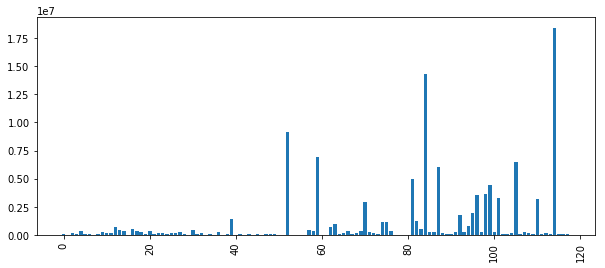

In [411]:
# Graph Data
#plt.bar(np.arange(0,len(df),1),df["Views"], tick_label = df["Date"])
plt.bar(np.arange(0,len(df),1),df["Views"])
plt.xticks(rotation=90)
plt.rcParams["figure.figsize"] = [10,4]